**Грамматический анализатор**

Евгений Борисов <esborisov@sevsu.ru>

синтаксические парсеры библиотеки NLTK

---

Синтаксический анализ в NLTK.   
https://habr.com/ru/post/340574/   
https://habr.com/ru/post/342162/      

Steven Bird, Ewan Klein, and Edward Loper  Natural Language Processing with Python.   
chapter 9. Building Feature Based Grammars.   
https://www.nltk.org/book/ch09.html

----

In [118]:
from nltk import CFG # Context-free grammar

grammar = CFG.fromstring("""
S -> OLT
OLT -> OBJ | OBJ UN OLT
OBJ ->  ADJ NP
NP -> 'сок' | 'морс' | 'компот'
ADJ -> 'апельсиновый' | 'вишнёвый' | 'абрикосовый' | 'томатный'
UN -> ',' |'и'
""")

grammar, grammar.start(), grammar.productions() 

(<Grammar with 13 productions>,
 S,
 [S -> OLT,
  OLT -> OBJ,
  OLT -> OBJ UN OLT,
  OBJ -> ADJ NP,
  NP -> 'сок',
  NP -> 'морс',
  NP -> 'компот',
  ADJ -> 'апельсиновый',
  ADJ -> 'вишнёвый',
  ADJ -> 'абрикосовый',
  ADJ -> 'томатный',
  UN -> ',',
  UN -> 'и'])

In [119]:
from nltk.tokenize import word_tokenize as nltk_tokenize_word
from nltk import ChartParser as Parser
sentence = 'вишнёвый сок, абрикосовый компот, апельсиновый морс и томатный сок'

tokens = nltk_tokenize_word(sentence)

for tree in Parser(grammar).parse(tokens):  
    tree.pretty_print()
    # display(tree)

                                             S                                            
                                             |                                             
                                            OLT                                           
           __________________________________|_______                                      
          |       |                                 OLT                                   
          |       |                __________________|_________________                    
          |       |               |          |                        OLT                 
          |       |               |          |                 ________|____________       
          |       |               |          |                |        |           OLT    
          |       |               |          |                |        |            |      
         OBJ      |              OBJ         |               OBJ       |           OB

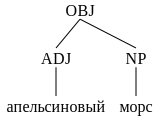

In [130]:
tree[0][2][2][0]